In [1]:
import mne
#https://mne.tools/stable/auto_tutorials/sample-datasets/plot_sleep.html#sphx-glr-auto-tutorials-sample-datasets-plot-sleep-py

The *Hypnogram.edf files contain annotations of the sleep patterns that correspond to the PSGs. These patterns (hypnograms) consist of sleep stages W, R, 1, 2, 3, 4, M (Movement time) and ? (not scored). All hypnograms were manually scored by well-trained technicians (identified by the eighth letter of the hypnogram filename) according to the 1968 Rechtschaffen and Kales manual [3], but based on Fpz-Cz/Pz-Oz EEGs instead of C4-A1/C3-A2 EEGs, as suggested by [4]).

In [20]:
!pip install pyEDFlib

In [2]:
import numpy as np
import mne
edf = mne.io.read_raw_edf('D:\sleep-cassette\SC4001E0-PSG.edf')
header = ','.join(edf.ch_names)
np.savetxt('sleep.csv', edf.get_data().T, delimiter=',', header=header)

Extracting EDF parameters from D:\sleep-cassette\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [21]:
raw_data = data.get_data()

In [26]:
import pyedflib
import numpy as np
import os

file_name = ('D:\sleep-cassette\SC4011E0-PSG.edf')
f = pyedflib.EdfReader(file_name)
annotations = f.readAnnotations()  
print(annotations)  

(array([], dtype=float64), array([], dtype=float64), array([], dtype=float64))


In [27]:
import pandas as pd
sleep_data = pd.read_csv('sleep.csv')

In [ ]:
hat it has not been scored. All hypnograms were manually scored by well-trained
technicians according to the R&K manual. Each signal is processed in 10 s 

In [28]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
# EEG Fpz-Cz      1048575 non-null float64
EEG Pz-Oz         1048575 non-null float64
EOG horizontal    1048575 non-null float64
Resp oro-nasal    1048575 non-null float64
EMG submental     1048575 non-null float64
Temp rectal       1048575 non-null float64
Event marker      1048575 non-null float64
dtypes: float64(7)
memory usage: 56.0 MB


Sleep stage scoring is generally conducted based on Polysomnographic (PSG)
recordings that are acquired from the patients while they sleep overnight at the hospital [5,9,16,17].
Traditionally, overnight PSG recordings including Electroencephalogram (EEG), Electrooculogram
(EOG), Electromyogram (EMG) and Electrocardiogram (ECG) recordings, are visually scored by
experts using guidelines developed by Rechtschaffen and Kales (R&K) in 1968 . 
1. The PSG recording is first divided into 20- or 30-s epochs, which are subsequently classified as Wakefulness (W),
2. Rapid Eye Movement (REM) sleep and Non-REM (NREM). NREM sleep is further divided into stages 1, 2, 3 and 4 (also referred to as S1, S2, S3 and S4) according to the guidelines of R&K and more recent guidelines proposed by the American Academy of Sleep Medicine (AASM) in 2007 .
3. The major changes of the AASM standards combine the NREM stages S3 and S4 into a single stage of deep sleep called N3 or also referred to as Slow Wave Sleep (SWS) 

# Data Exploration

<b>
Feature Explanation:
    
1. EEG Fpz-Cz and EEG Fpz-Cz  both are vertical spiltting of brain
2. EOG horizontal: Eye movement
3. Resp oro-nasal: Oral respiratory
4. EMG submental: ElectroMyoGraphy  #https://behavenet.com/electromyogram
5. Temp rectal: upward movement while sleeping
6. Event marker: #https://neuroimage.usc.edu/brainstorm/Tutorials/EventMarkers

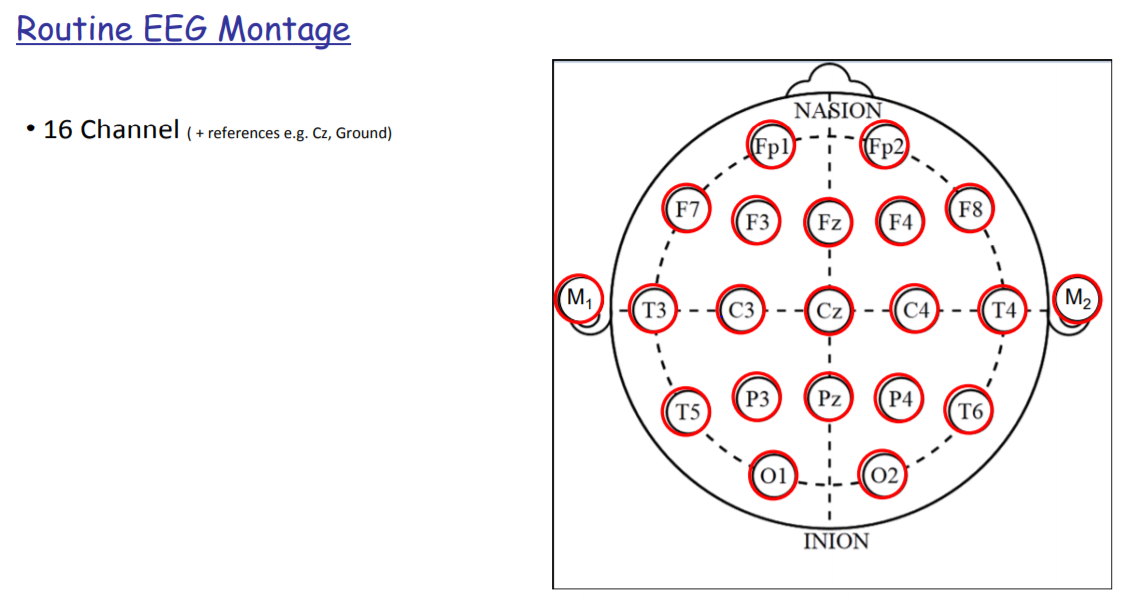

In [45]:
from IPython.display import Image
Image("16channel.png")


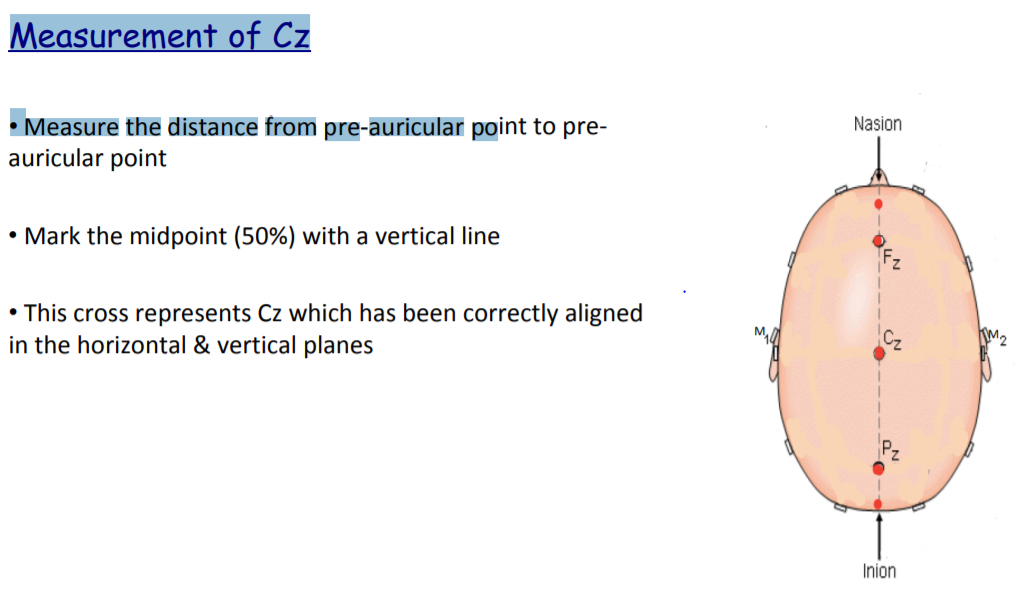

In [46]:
Image("cz_fz.png")

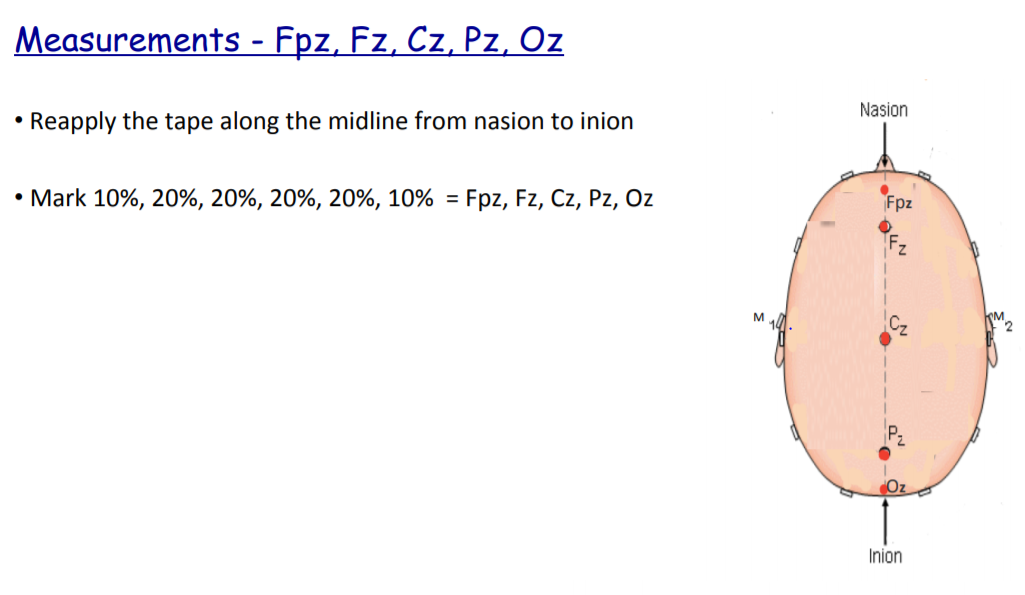

In [47]:
Image("fpz.png")

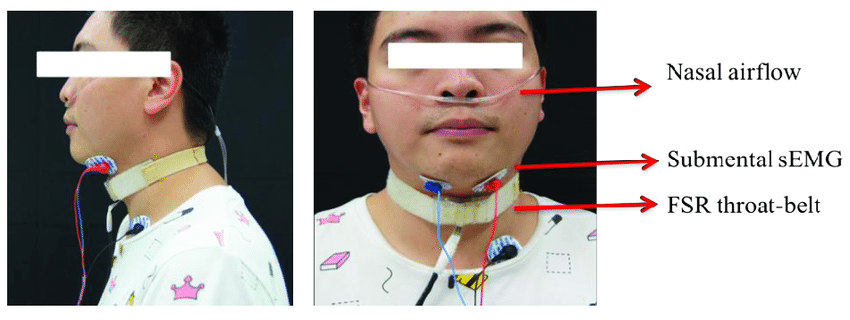

In [48]:
Image("submital_emg.png")

1. Every 100 rows = 1 sec
2. So 30sec time frame will be 3000 rows
3. 3000 frame patterns  

In [32]:

import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets.sleep_physionet.age import fetch_data
from mne.time_frequency import 


In [34]:
ALICE, BOB = 0, 1

[alice_files, bob_files] = fetch_data(subjects=[ALICE, BOB], recording=[1])

mapping = {'EOG horizontal': 'eog',
           'Resp oro-nasal': 'misc',
           'EMG submental': 'misc',
           'Temp rectal': 'misc',
           'Event marker': 'misc'}



Using default location ~/mne_data for PHYSIONET_SLEEP...
Creating ~/mne_data
[............................................................] 100.00% ( 46.1 MB,  18.3 MB/s) |
Verifying hash adabd3b01fc7bb75c523a974f38ee3ae4e57b40f.
[............................................................] 100.00% (    5 kB,     5 kB/s) |
Verifying hash 21c998eadc8b1e3ea6727d3585186b8f76e7e70b.
[............................................................] 100.00% ( 48.7 MB,  19.4 MB/s) /
Verifying hash 4d17451f7847355bcab17584de05e7e1df58c660.
[............................................................] 100.00% (    4 kB,     4 kB/s) |
Verifying hash d582a3cbe2db481a362af890bc5a2f5ca7c878dc.


Extracting EDF parameters from C:\Users\Swayanshu\mne_data\physionet-sleep-data\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


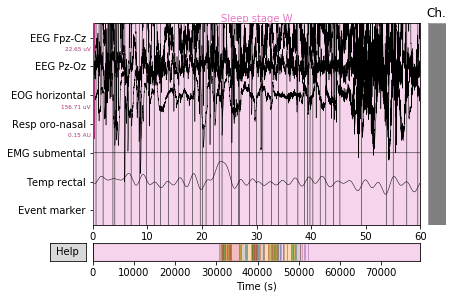

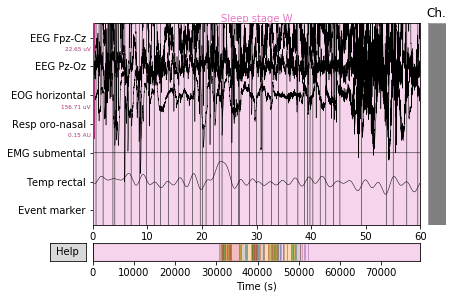

In [35]:
raw_train = mne.io.read_raw_edf(alice_files[0])
annot_train = mne.read_annotations(alice_files[1])

raw_train.set_annotations(annot_train, emit_warning=False)
raw_train.set_channel_types(mapping)

# plot some data
raw_train.plot(duration=60, scalings='auto')

In [36]:
annotation_desc_2_event_id = {'Sleep stage W': 1,
                              'Sleep stage 1': 2,
                              'Sleep stage 2': 3,
                              'Sleep stage 3': 4,
                              'Sleep stage 4': 4,
                              'Sleep stage R': 5}

events_train, _ = mne.events_from_annotations(
    raw_train, event_id=annotation_desc_2_event_id, chunk_duration=30.)



Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


In [37]:
# create a new event_id that unifies stages 3 and 4
event_id = {'Sleep stage W': 1,
            'Sleep stage 1': 2,
            'Sleep stage 2': 3,
            'Sleep stage 3/4': 4,
            'Sleep stage R': 5}


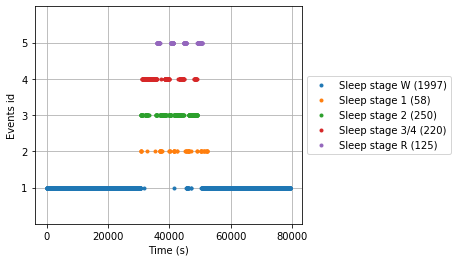

In [38]:

# plot events
mne.viz.plot_events(events_train, event_id=event_id,
                    sfreq=raw_train.info['sfreq'])

# keep the color-code for further plotting
stage_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

Create Epochs from the data based on the events found in the annotations

In [39]:
tmax = 30. - 1. / raw_train.info['sfreq']  # tmax in included

epochs_train = mne.Epochs(raw=raw_train, events=events_train,
                          event_id=event_id, tmin=0., tmax=tmax, baseline=None)

print(epochs_train)

2650 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
<Epochs  |   2650 events (good & bad), 0 - 29.99 sec, baseline off, ~19 kB, data not loaded,
 'Sleep stage 1': 58
 'Sleep stage 2': 250
 'Sleep stage 3/4': 220
 'Sleep stage R': 125
 'Sleep stage W': 1997>


Applying the same steps to the test data from Bob

In [40]:
raw_test = mne.io.read_raw_edf(bob_files[0])
annot_test = mne.read_annotations(bob_files[1])
raw_test.set_annotations(annot_test, emit_warning=False)
raw_test.set_channel_types(mapping)
events_test, _ = mne.events_from_annotations(
    raw_test, event_id=annotation_desc_2_event_id, chunk_duration=30.)
epochs_test = mne.Epochs(raw=raw_test, events=events_test, event_id=event_id,
                         tmin=0., tmax=tmax, baseline=None)

print(epochs_test)

Extracting EDF parameters from C:\Users\Swayanshu\mne_data\physionet-sleep-data\SC4011E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
2802 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
<Epochs  |   2802 events (good & bad), 0 - 29.99 sec, baseline off, ~19 kB, data not loaded,
 'Sleep stage 1': 109
 'Sleep stage 2': 562
 'Sleep stage 3/4': 105
 'Sleep stage R': 170
 'Sleep stage W': 1856>


In [5]:
!pip install --upgrade yasa

  Stored in directory: C:\Users\Swayanshu\AppData\Local\pip\Cache\wheels\4f\c1\ff\4c54c0e95b9297ac2a6e554087ce322433f677753756a9c9ea
Successfully built yasa


# Sleep stages

1. Stage 1 Sleep
<br>
Stage 1 sleep is called light or transition sleep. It is the transition from wakefulness to sleep. It is characterized by the gradual slowing of the EEG. Often patients will be awake, with eyes closed and demonstrate alpha rhythms as they slip into stage 1. This rhythm begins to slowly widen and slow and take on the characteristics of theta rhythm. Theta activity comprises most of the EEG activity in stage 1.
<br>
Besides theta waves, one is apt also to see occasional vertex sharp waves. There are no spindles or K complexes in this stage. In observing the eyes, one also notes slow rolling eye movements, each stretching more than several seconds long. These are more prominent in the early portion of stage 1, but gradually disappear as this phase progresses. Myoclonic twitches of the limb muscles may occur. Once alpha rhythms decrease to less than 50% of the epoch and theta rhythms occupy more than 50%, stage 1 can be scored. Stage 1 sleep occupies between 5% and 7% of a normal subject’s total sleep time.
<br>
2. Stage 2 Sleep
<br>
Stage 2 sleep begins with the appearance of spindles and K complexes. The background frequency is between 1 Hz and 5 Hz and is of low amplitude. Since K complexes and spindles are intermittent phenomena, a time factor must be considered in order to properly score this stage. Known as the 3 Minute Rule, this factor states that if more than 3 minutes elapse since the time of the last K complex or sleep spindle, then the intervening epochs are scored as Stage 1. If less than 3 minutes (6 x 30-second epochs) pass before another K complex or spindle occurs, then the intervening epochs continue to be scored as stage 2. If movement artifact or stage wake appears within 3 minutes, then the stage is still scored as stage 2 but only up to the point of the arousal. After an arousal, scoring rules reset themselves and the resuming epochs are scored as stage 1 until a K complex or spindle appears again. It is very important to keep track of the epoch scores that proceeded the epoch under consideration. Stage 2 usually occupies about 50% of a normal night’s sleep time.
<br>
3. Delta Sleep—Stages 3 and 4
<br>
Delta sleep is also known as slow wave sleep (SWS) or deep sleep. It is comprised of both stages 3 and 4. These are characterized by slow, high amplitude waves with a frequency of less than 2 Hz and an amplitude of at least 75 mV. K complexes and spindles may be present throughout delta sleep but may be obscured. This type of sleep makes up about 25% of a normal adult’s sleep. In children, teenagers, and young adults, it may be much more prevalent. Stage 3 is present when between 20% and 50% of an epoch is composed of delta waves, although sometimes it can be difficult to discern between stage 2 and stage 3. In order to quantify the amount of an epoch that is comprised of delta waves, one must measure the width of each waveform and add them together to determine the time axis occupied. Stage 4 sleep is present when more than 50% of an epoch is composed of delta waves.
<br>
4. REM Sleep
<br>
REM sleep is often referred to as paradoxical or active sleep. It is the sleep stage when dreaming occurs. If present, the EEG drops to a mixed frequency, mostly low voltage recording. One can differentiate between stage 1 and REM by looking at the chin EMG lead. The amplitude in stage REM is extremely low whereas it is higher in stage 1. In fact, during REM the chin EMG should be at its lowest point of the whole night. Short phasic twitches of the limb muscles may occur during REM, although normal individuals are completely paralyzed during REM.
<br>
Another factor that helps to diagnose REM is the presence of rapid eye movements that appear intermittently throughout this stage. Respiratory variation as well as cardiac sinus arrhythmia can be present, especially during phasic REM. Spindles also occur on occasion during REM, which can make differentiating between REM and stage 2 a little more difficult. As long as the time between spindles is 3 minutes or more, the stage is scored as REM. EMG tone is the ultimate arbiter in many cases. Comparing chin tone during stage 2 and the stage in question is helpful. Sawtooth waves can also sometimes be seen during REM. These are waves that have a narrowed, triangular appearance running at frequencies of 2 Hz to 6 Hz and at amplitudes between 40 mV and 100 mV. They usually occur for a few seconds at a time.